In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pywaffle import Waffle
import numpy as np
import math
import itertools

In [2]:
prec = 0.87
recall = 0.37

In [3]:
# (prec - 1) * tp + prec * fp = 0
#(recall - 1) * tp + recall * fn = 0 
# tp + fp + fn + tn = 1

In [104]:
y_true = [0, 0, 1, 1, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1, 0, 0]
cm = confusion_matrix(y_true, y_pred)

In [77]:
cm

array([[4, 1],
       [2, 2]])

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


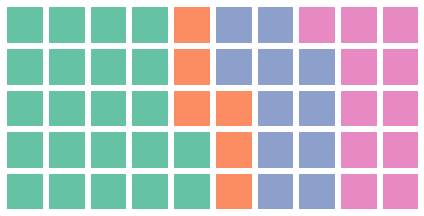

In [6]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,  # Either rows or columns could be omitted
    values=cm.ravel()
)
fig.show()

In [7]:
tn, fp, fn, tp = cm.ravel()

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


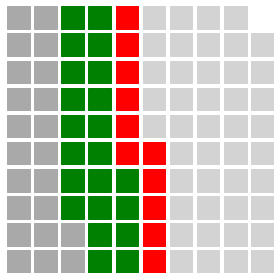

In [8]:
reordered = [fn, tp, fp, tn]
colors=["darkgrey", "green", "red", "lightgrey"]
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=10,  # Either rows or columns could be omitted
    values=reordered,
    colors=["darkgrey", "green", "red", "lightgrey"]
)
fig.show()

<class 'pywaffle.waffle.Waffle'>


/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


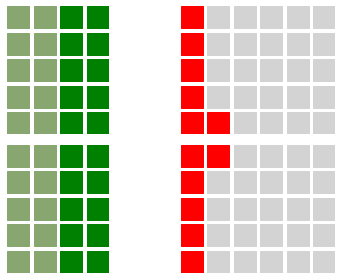

In [9]:
reordered = [fn, tp, fp, tn]
colors=["#88a770", "green", "red", "lightgrey"]

rows = 10
cols = 10
col_ratio = (fn+tp)/sum(reordered)
col_part = int(round(cols * col_ratio))

fig = plt.figure(
    FigureClass=Waffle,
    rows=rows // 2,
      # Either rows or columns could be omitted
    plots = {
        "221": {
            'values':[n/2 for n in reordered[:2] ],
            'starting_location': "NW",
            "colors": colors[:2],
            "columns": col_part,
        },
        "223": {
            'values':[n/2 for n in reordered[:2] ],
            'starting_location': "SW",
            "colors": colors[:2],
            "columns": col_part,
        },
        
        "222": {
            'values':[n/2 for n in reordered[2:] ],
            'starting_location': "SW",
            "colors": colors[2:],
            "columns": cols - col_part,
        },
        "224": {
            'values':[n/2 for n in reordered[2:] ],
            'starting_location': "NW",
            "colors": colors[2:],
            "columns": cols - col_part,
        },
        
    },
    #values=[fn/2, tp/2],
    
    vertical=False,
)

print(fig.__class__)

fig.show()

 h = 9
 3, 4 == 4.0
 4, 4 == 4.0
 5, 4 == 4.0
 6, 4 == 4.0
 7, 4 == 4.0
 8, 4 == 4.0
 9, 4 == 4.0
 10, 4 == 4.0
 11, 4 == 4.0
 3, 3 == 1.0
 4, 3 == 1.0
 5, 3 == 1.0
 6, 3 == 1.0
 7, 3 == 4.0
 8, 3 == 4.0
 9, 3 == 4.0
 10, 3 == 4.0
 11, 3 == 4.0
 3, 2 == 1.0
 4, 2 == 1.0
 5, 2 == 1.0
 6, 2 == 1.0
 7, 2 == 1.0
 8, 2 == 1.0
 9, 2 == 1.0
 10, 2 == 1.0
 11, 2 == 1.0
 3, 1 == 1.0
 4, 1 == 1.0
 5, 1 == 1.0
 6, 1 == 1.0
 7, 1 == 1.0
 8, 1 == 1.0
 9, 1 == 1.0
 10, 1 == 1.0
 11, 1 == 1.0
 3, 0 == 1.0
 4, 0 == 1.0
 5, 0 == 1.0
 3, 2 == 2.0
 4, 2 == 2.0
 5, 2 == 2.0
 6, 2 == 2.0
 7, 2 == 2.0
 8, 2 == 2.0
 9, 2 == 2.0
 10, 2 == 2.0
 11, 2 == 2.0
 3, 3 == 2.0
 4, 3 == 2.0
 5, 3 == 2.0
 6, 3 == 2.0
 7, 3 == 4.0
 8, 3 == 4.0
 9, 3 == 4.0
 10, 3 == 4.0
 11, 3 == 4.0
 3, 4 == 4.0
 4, 4 == 4.0
 5, 4 == 4.0
 6, 4 == 4.0
 7, 4 == 4.0
 8, 4 == 4.0
 9, 4 == 4.0


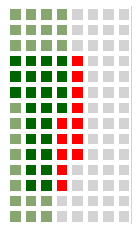

In [105]:

def build_waffle_matrix(size, confusion_matrix):
    rows, cols = size
    hmap = np.ones( (rows, cols) )
    tn, fp, fn, tp = cm.ravel()
    col_ratio = (fn+tp)/sum(cm.ravel())
    col_part = int(math.floor(cols * col_ratio))
    col_rest = int()
    fn_tp_boxes = (fn+tp) * cols * rows // sum(cm.ravel())    

    for n in range(fn_tp_boxes, rows * cols):
        ix = n % rows
        iy = n // rows
        hmap[ix, iy] = 4

    h = min(
        int(math.ceil(max( tp/col_part, fp / (cols - col_part)) * rows * cols/ sum(reordered))),
        rows)
    print(f" h = {h}")

    centery = col_part
    centerx = int(math.ceil(rows / 2))

    midh = int(round(h/2))
    tp_boxes = int(round(tp * cols * rows / sum(reordered)))
    fp_boxes = int(round(fp * cols * rows / sum(reordered)))

    def boxes_generator(direction=-1, expected_value=1):
        n = 0
        while (True):
            ix = centerx - midh + (n % h) 
            iy = centery + direction * (n//h - 1)
            
            n += 1
            print(f" {ix}, {iy} == {hmap[ix, iy]}")
            if hmap[ix, iy] == expected_value:
                yield ix, iy
                
    tp_boxes_gen = boxes_generator(direction=-1, expected_value=1)
    toUpdate = itertools.islice(tp_boxes_gen, tp_boxes)        
    for xy in toUpdate:
        ix, iy = xy
        assert(hmap[ix, iy] == 1)
        hmap[ix, iy] = 2
        
    fp_boxes_gen = boxes_generator(direction=1, expected_value=4)
    toUpdate = itertools.islice(fp_boxes_gen, fp_boxes)
    for xy in toUpdate:
        ix, iy = xy        
        assert(hmap[ix, iy] == 4)
        hmap[ix, iy] = 3
        
    return hmap

def plot_waffle_matrix(hmap, 
                       cmap = (mpl.colors.ListedColormap(["#88a770", "darkgreen", "red", "lightgrey"])), 
                       linewidth=5
                      ):
    fig, ax = plt.subplots()

    im = ax.imshow(hmap, cmap=cmap)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    unitmove = 1.0
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticks(np.arange(hmap.shape[1]+unitmove)-unitmove/2, minor=True)
    ax.set_yticks(np.arange(hmap.shape[0]+unitmove)-unitmove/2, minor=True)
    
    ax.grid(which="minor", color="w", linestyle='-', linewidth=linewidth)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

hmap = build_waffle_matrix( (14, 8), cm)
plot_waffle_matrix(hmap)

In [98]:
import random
random.seed(3)
rng = np.random.default_rng(seed=42)

def test_build_waffle_matrix(cols, rows, cm):
    hmap = build_waffle_matrix( (cols, rows), cm)
    tn, fp, fn, tp = cm.ravel()
    values, counts = np.unique(hmap, return_counts=True)
    result_counts = [0] * 4
    for v, c in zip(values, counts):
        print(v)
        result_counts[int(v)-1] = c
        
    ordered_vector = [fn, tp, fp, tn]
    normalized_vect =  ordered_vector / sum(ordered_vector) * cols * rows

    print(normalized_vect)
    print(result_counts)
    print(f"counts sum = {sum(result_counts)} - cols x rows = { cols * rows} ")
    max_error = np.max(np.abs(normalized_vect - result_counts))    
    assert max_error < 2.0, f" max_error = {max_error}"

for i in range(15):
    cols = random.randint(5, 15)
    rows = random.randint(5, 15)
    print( (rows, cols))
    cm = rng.integers(low=3, high=100, size=(2, 2))
    print(cm)
    
    test_build_waffle_matrix(cols, rows, cm)

(14, 8)
[[11 78]
 [66 45]]
 h = 8
 0, 8 == 4.0
 1, 8 == 4.0
 2, 8 == 4.0
 3, 8 == 4.0
 4, 8 == 4.0
 5, 8 == 4.0
 6, 8 == 4.0
 7, 8 == 4.0
 0, 7 == 1.0
 1, 7 == 1.0
 2, 7 == 1.0
 3, 7 == 1.0
 4, 7 == 1.0
 5, 7 == 1.0
 6, 7 == 4.0
 7, 7 == 4.0
 0, 6 == 1.0
 1, 6 == 1.0
 2, 6 == 1.0
 3, 6 == 1.0
 4, 6 == 1.0
 5, 6 == 1.0
 6, 6 == 1.0
 7, 6 == 1.0
 0, 5 == 1.0
 1, 5 == 1.0
 2, 5 == 1.0
 3, 5 == 1.0
 4, 5 == 1.0
 5, 5 == 1.0
 6, 5 == 1.0
 7, 5 == 1.0
 0, 4 == 1.0
 1, 4 == 1.0
 2, 4 == 1.0
 3, 4 == 1.0
 4, 4 == 1.0
 5, 4 == 1.0
 6, 4 == 1.0
 7, 4 == 1.0
 0, 3 == 1.0
 1, 3 == 1.0
 2, 3 == 1.0
 3, 3 == 1.0
 4, 3 == 1.0
 5, 3 == 1.0
 6, 3 == 1.0
 7, 3 == 1.0
 0, 2 == 1.0
 1, 2 == 1.0
 2, 2 == 1.0
 3, 2 == 1.0
 4, 2 == 1.0
 5, 2 == 1.0
 6, 2 == 1.0
 7, 2 == 1.0
 0, 1 == 1.0
 1, 1 == 1.0
 2, 1 == 1.0
 3, 1 == 1.0
 4, 1 == 1.0
 5, 1 == 1.0
 6, 1 == 1.0
 7, 1 == 1.0
 0, 0 == 1.0
 1, 0 == 1.0
 2, 0 == 1.0
 3, 0 == 1.0
 4, 0 == 1.0
 5, 0 == 1.0
 6, 0 == 1.0
 7, 0 == 1.0
 0, -1 == 4.0
 1, -1 == 4.0
 2

IndexError: index -15 is out of bounds for axis 1 with size 14

In [ ]:
max( tp/col_part, fp / (cols - col_part))

In [ ]:
(tp/col_part, fp / (cols - col_part))

In [ ]:
col_part